In [1]:
pip install pandas_ods_reader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_ods_reader import read_ods

In [3]:
from scipy.interpolate import interp1d

In [4]:
base_path = "C:/Users/Natalia/Documents/labs/2.2.1.ods"
sheet_index = 1
df = read_ods(base_path , sheet_index)

In [5]:
df

,t,"U, 40 tor","LnU, 40 torr","Ln(U/U0), 40 torr","U, 60 tor","LnU, 60 torr","Ln(U/U0), 60 torr","U, 80 tor","LnU, 80 torr","Ln(U/U0), 80 torr",...,"U, 120 tor","LnU, 120 torr","Ln(U/U0), 120 torr","P,torr","P,pascal",1/P,1/Ʈ,D,"L/S, sm^(-1)","V, sm^3"
0,0.0,0.00461,5.379527,0.000000,0.01001,4.604171,0.000000,0.00595,5.124364,0.000000,...,0.00940,4.667046,0.000000,40.0,5332.0,0.025000,0.003887,9.094574,13.0,360.0
1,10.0,0.00455,5.392628,0.013101,0.00982,4.623334,0.019163,0.00586,5.139606,0.015242,...,0.00927,4.680972,0.013926,60.0,7998.0,0.016667,0.003237,7.573972,NaN,NaN
2,20.0,0.00436,5.435283,0.055756,0.00961,4.644951,0.040780,0.00572,5.163786,0.039422,...,0.00909,4.700580,0.033535,80.0,10664.0,0.012500,0.002607,6.099327,NaN,NaN
3,30.0,0.00418,5.477444,0.097917,0.00919,4.689639,0.085469,0.00556,5.192157,0.067793,...,0.00893,4.718339,0.051293,100.0,13330.0,0.010000,0.002183,5.107799,NaN,NaN
4,40.0,0.00401,5.518964,0.139437,0.00889,4.722828,0.118658,0.00541,5.219506,0.095142,...,0.00876,4.737559,0.070514,120.0,15996.0,0.008333,0.001883,4.405846,NaN,NaN
5,50.0,0.00384,5.562283,0.182755,0.00860,4.755993,0.151822,0.00527,5.245725,0.121361,...,0.00858,4.758321,0.091276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60.0,0.00368,5.604843,0.225315,0.00831,4.790296,0.186125,0.00513,5.272650,0.148286,...,0.00842,4.777145,0.110100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,70.0,0.00353,5.646457,0.266930,0.00805,4.822083,0.217913,0.00501,5.296319,0.171955,...,0.00826,4.796331,0.129285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,80.0,0.00340,5.683980,0.304452,0.00779,4.854914,0.250744,0.00488,5.322610,0.198246,...,0.00810,4.815891,0.148846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,90.0,0.00327,5.722965,0.343438,0.00754,4.887533,0.283362,0.00476,5.347508,0.223144,...,0.00795,4.834583,0.167538,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
d_array = df.to_numpy()

In [8]:
d_array_lnU_U0_40 = d_array[0:18, 3]
d_array_lnU_U0_60 = d_array[0:23, 6]
d_array_lnU_U0_80 = d_array[0:27, 9]
d_array_lnU_U0_100 = d_array[0:29, 12]
d_array_lnU_U0_120 = d_array[0:30, 15]
d_array_t_40 = d_array[0:18, 0]
d_array_t_60 = d_array[0:23, 0]
d_array_t_80 = d_array[0:27, 0]
d_array_t_100 = d_array[0:29, 0]
d_array_t_120 = d_array[0:30, 0]
d_array_D = d_array[0:5, 20]
d_array_1_P = d_array[0:5, 18]

In [9]:
d_array_D


array([9.0945738, 7.5739716, 6.099327 , 5.1077988, 4.4058456])

In [57]:
from scipy import optimize
def test_func(x, a, b):
    return a*x + b
p0=[0,0]
params_40, params_covariance_40 = optimize.curve_fit(test_func, d_array_t_40, d_array_lnU_U0_40,
                                               p0)
params_60, params_covariance_60 = optimize.curve_fit(test_func, d_array_t_60, d_array_lnU_U0_60,
                                               p0)
params_80, params_covariance_80 = optimize.curve_fit(test_func, d_array_t_80, d_array_lnU_U0_80,
                                               p0)
params_100, params_covariance_100 = optimize.curve_fit(test_func, d_array_t_100, d_array_lnU_U0_100,
                                               p0)
params_120, params_covariance_120 = optimize.curve_fit(test_func, d_array_t_120, d_array_lnU_U0_120,
                                               p0)

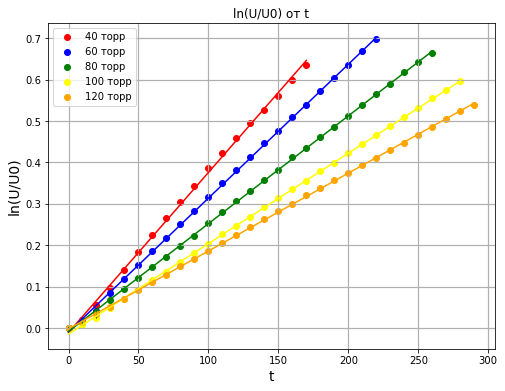

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("ln(U/U0) от t", fontsize=12)
ax.set_xlabel("t", fontsize=14)
ax.set_ylabel("ln(U/U0)", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_t_40,d_array_lnU_U0_40, c="red",label = "40 торр" )
ax.scatter(d_array_t_60,d_array_lnU_U0_60, c="blue",label = "60 торр" )
ax.scatter(d_array_t_80,d_array_lnU_U0_80, c="green",label = "80 торр" )
ax.scatter(d_array_t_100,d_array_lnU_U0_100, c="yellow",label = "100 торр" )
ax.scatter(d_array_t_120,d_array_lnU_U0_120, c="orange",label = "120 торр" )



ax.plot(d_array_t_40, test_func(d_array_t_40, params_40[0], params_40[1]),c="red")
ax.plot(d_array_t_60, test_func(d_array_t_60, params_60[0], params_60[1]),c="blue")
ax.plot(d_array_t_80, test_func(d_array_t_80, params_80[0], params_80[1]),c="green")
ax.plot(d_array_t_100, test_func(d_array_t_100, params_100[0], params_100[1]),c="yellow")
ax.plot(d_array_t_120, test_func(d_array_t_120, params_120[0], params_120[1]),c="orange")

ax.errorbar(d_array_t_40,d_array_lnU_U0_40, xerr=0.01, yerr=0, c="green",fmt='none' )
ax.errorbar(d_array_t_60,d_array_lnU_U0_60, xerr=0.01, yerr=0, c="green",fmt='none' )
ax.errorbar(d_array_t_80,d_array_lnU_U0_80, xerr=0.01, yerr=0, c="green",fmt='none' )
ax.errorbar(d_array_t_100,d_array_lnU_U0_100, xerr=0.01, yerr=0, c="green",fmt='none' )
ax.errorbar(d_array_t_120,d_array_lnU_U0_120, xerr=0.01, yerr=0, c="green",fmt='none' )


#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [59]:
covariance_errors = [params_covariance_40[0][0],params_covariance_60[0][0],params_covariance_80[0][0],params_covariance_100[0][0],params_covariance_120[0][0]]
covariance_errors = np.array(covariance_errors)

In [60]:
covariance_errors #погрешность 1/константа времени

array([1.49711050e-09, 1.84273645e-10, 4.01227344e-11, 4.87133268e-11,
       1.80752860e-11])

In [61]:
const_time = [params_40[0],params_60[0],params_80[0],params_100[0],params_120[0]] #один делить на тау (константа времени)
const_time = np.array(const_time)

In [62]:
const_time

array([0.00386451, 0.00323221, 0.00260318, 0.00218199, 0.00188011])

In [69]:
from scipy import optimize
def test_func1(x, a, b, c):
    return a*x**2 + b*x + c
p01 = [0,0,0]
params_d, params_covariance_d = optimize.curve_fit(test_func1, d_array_1_P, d_array_D,
                                               p01)

In [76]:
points=np.linspace(0.0083,0.025,100)

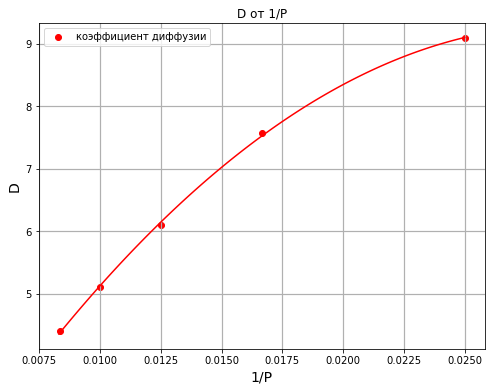

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("D от 1/P", fontsize=12)
ax.set_xlabel("1/P", fontsize=14)
ax.set_ylabel("D", fontsize=14)
ax.grid(which="major", linewidth=1.2)
#ax.set_ylim(0.01, 0.3)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)
ax.scatter(d_array_1_P,d_array_D, c="red",label = "коэффициент диффузии" )

ax.plot(points, test_func1(points, params_d[0], params_d[1], params_d[2]),c="red")
#ax.errorbar(d_array_1_P,d_array_D, xerr=d_P, yerr=0, c="green",fmt='none' )
#ax.errorbar(d_array_T, d_array_Sig, xerr=0, yerr=0.03, c="green")
#plt.fill_between(d_array_T, -0.00012166*d_array_T+0.03, -0.00012166*d_array_T+0.03, alpha=0.3)
ax.legend()
#ax.tick_params(which='major', length=10, width=2)
#ax.tick_params(which='minor', length=5, width=1)
plt.show()

In [80]:
D_atm = 0.0013*0.0013*params_d[0] + params_d[1]*0.0013 + params_d[2]
print(D_atm)

0.47359384652414566


In [ ]:
#коэффициент взаимной диффузии 
D_atm = 0.47 +- 0.05